##Starting story of **K_MEAN**

In [ ]:
import os
import math
import pickle
import numpy as np
import pandas as pd
import cv2
import random
from collections import Counter
from pylab import rcParams
import seaborn as sns
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Enable inline plotting
%matplotlib inline

# Load all files in the '/content/sample_data' directory and print their path
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv


In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        Data = pickle.load(fo, encoding='latin1')
    return Data
    

In [ ]:
trainData = unpickle('/content/drive/MyDrive/Colab Notebooks/train')
#type of items in each file
for item in trainData:
    print(item, type(trainData[item]))
    

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [ ]:
testData = unpickle('/content/drive/MyDrive/Colab Notebooks/test')
metaData = unpickle('/content/drive/MyDrive/Colab Notebooks/meta')


print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])


Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [ ]:
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])
print(subCategory)


         SubClass
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]


In [ ]:
X_train = trainData['data']
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)


In [ ]:
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)

Image number selected : 14439
Shape of image : (32, 32, 3)
Image subcategory number: 79
Image subcategory name: Spider


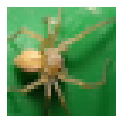

In [ ]:
rcParams['figure.figsize'] = 2,2
imageId = np.random.randint(0, len(X_train))
plt.imshow(X_train[imageId])
plt.axis('off')


print("Image number selected : {}".format(imageId))
print("Shape of image : {}".format(X_train[imageId].shape))
print("Image subcategory number: {}".format(trainData['fine_labels'][imageId]))
print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))

In [ ]:
winSize = (32,32)
blockSize = (8,8)
blockStride = (4,4)
cellSize = (4,4)
nbins = 9


df = []


In [ ]:
for i in range(300):
    image = cv2.cvtColor(X_train[i],cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)
    df.append(hog.compute(image))
    
DF = pd.DataFrame(df)
DF


,0,1,2,3,4,5,6,7,8,9,...,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763
0,0.032799,0.015301,0.045787,0.000000,0.069334,0.000000,0.000000,0.000000,0.032799,0.067754,...,0.098908,0.316263,0.316263,0.248816,0.060455,0.195416,0.000000,0.025893,0.150303,0.213901
1,0.006916,0.000000,0.000000,0.000000,0.241620,0.000000,0.000000,0.000000,0.006916,0.016505,...,0.000000,0.055166,0.000000,0.000000,0.000000,0.699561,0.000000,0.000000,0.000000,0.055166
2,0.327324,0.175260,0.089584,0.062461,0.073516,0.000000,0.000000,0.000000,0.047610,0.327324,...,0.248223,0.292329,0.292329,0.197667,0.280417,0.292329,0.000000,0.000000,0.000000,0.034408
3,0.097244,0.235721,0.044991,0.010438,0.005530,0.000000,0.000000,0.000000,0.008888,0.155014,...,0.058511,0.069262,0.084507,0.002409,0.000000,0.305709,0.124439,0.305709,0.305709,0.095173
4,0.227998,0.040255,0.278890,0.130381,0.014747,0.007472,0.119501,0.278890,0.096910,0.072541,...,0.261557,0.148019,0.049396,0.163622,0.247557,0.261557,0.261557,0.198627,0.261557,0.261557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.015261,0.001660,0.006808,0.010240,0.051829,0.241011,0.382743,0.230109,0.016544,0.005922,...,0.080543,0.013088,0.054601,0.040298,0.089604,0.203513,0.049282,0.035416,0.014040,0.008164
296,0.164032,0.255099,0.091958,0.035569,0.058803,0.020624,0.000000,0.031110,0.082456,0.138212,...,0.197430,0.094880,0.000000,0.000000,0.052631,0.289067,0.223638,0.157699,0.289067,0.289067
297,0.240968,0.134542,0.051913,0.089781,0.117541,0.089005,0.068863,0.122925,0.242454,0.254727,...,0.032603,0.012837,0.000645,0.019605,0.191716,0.333521,0.333521,0.169043,0.000796,0.012837
298,0.029414,0.001878,0.000681,0.023613,0.129748,0.082090,0.296294,0.296294,0.292885,0.296294,...,0.276884,0.276884,0.276884,0.276884,0.085740,0.033155,0.003666,0.036928,0.070690,0.158145


In [ ]:
def updateLabels(data, centroids):
    print("Enter UpdateLabels")

   #Euclidean distance
    distances = []
    labels = []
    
    for x in range(len(data)):
        distances = []
        for i in range(len(centroids)):
            distances.append(np.linalg.norm(data.iloc[x,:]- centroids[i]))

        labels.append(np.argmin(distances))        
    return labels

In [ ]:
def updateCentroids(data, labels):
    print("Enter UpdateCentroids")

    newCentroids = []
    
    for x in range(len(np.unique(labels))):
        labelIDs = []
        tempDF = pd.DataFrame(labelIDs)
        for i in range(len(labels)):
            if labels[i] == x:
                 tempDF.append(data.iloc[i, :])
        tempCentroid = []
        for i in range(len(tempDF.columns)):
            tempCentroid.append(np.mean(tempDF.iloc[:,i]))
        
        newCentroids.append(np.transpose(tempCentroid))     
    
    return newCentroids
    

In [ ]:
Centroids = []
CentroidsPrev = []
DataLabels = []

maxIterations = 100
epsilon = 0.0001

#Initialize centroids randomly
TempCentroid = []
for i in range(100):
    TempCentroid = []
for i in range(1764):
    TempCentroid = []
    for i in range(len(DF.columns)):
        TempCentroid.append(random.random())
    Centroids.append(TempCentroid)

#Iterate to optimize centroids
for i in range(maxIterations):
    #Update labels
    DataLabels = updateLabels(DF, Centroids)
    #Update Centroids
    CentroidsPrev = Centroids
    Centroids = updateCentroids(DF, DataLabels)
    
    print("Done = {}%".format(i))
    if np.linalg.norm(np.array(Centroids) - np.array(CentroidsPrev)) <= epsilon:
        print("Converged!")
        break

Enter UpdateLabels
Enter UpdateCentroids
Done = 0%


ValueError: ignored